In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=10,6

In [63]:
df=pd.read_csv(r"E:\datasets\Electric_Production.csv")

In [64]:
df['Date']=pd.to_datetime(df['Date'],infer_datetime_format=True)

In [65]:
inx=df.set_index(['Date'])

In [66]:
from datetime import datetime
inx


,Production
Date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


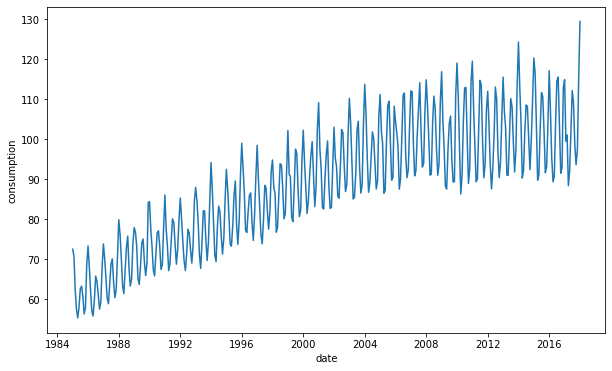

In [67]:
plt.xlabel("date")
plt.ylabel("consumption")
plt.plot(inx)

In [68]:
#det rolling statistics
rm=inx.rolling(window=12).mean()
rs=inx.rolling(window=12).std()
print(rm,rs)

            Production
Date                  
1985-01-01         NaN
1985-02-01         NaN
1985-03-01         NaN
1985-04-01         NaN
1985-05-01         NaN
...                ...
2017-09-01  101.234450
2017-10-01  101.411700
2017-11-01  101.782192
2017-12-01  101.944842
2018-01-01  103.157700

[397 rows x 1 columns]             Production
Date                  
1985-01-01         NaN
1985-02-01         NaN
1985-03-01         NaN
1985-04-01         NaN
1985-05-01         NaN
...                ...
2017-09-01    9.155641
2017-10-01    8.968447
2017-11-01    8.671317
2017-12-01    8.911131
2018-01-01   11.454780

[397 rows x 1 columns]


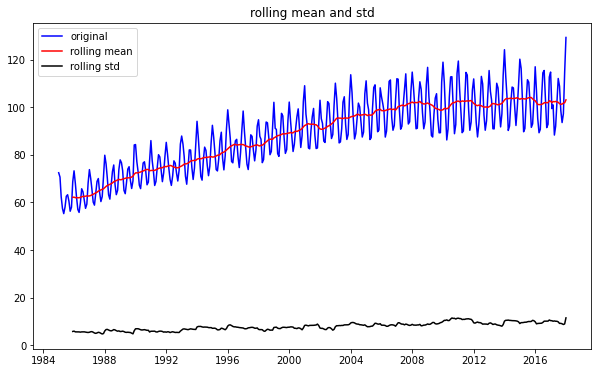

In [69]:
#plot rolling statistics:
org=plt.plot(inx,color='blue',label='original')
mean=plt.plot(rm,color='red',label='rolling mean')
std=plt.plot(rs,color='black',label='rolling std')
plt.legend(loc='best')
plt.title('rolling mean and std')
plt.show(block=False)

In [70]:
#dickey-fuller test:
from statsmodels.tsa.stattools import adfuller
print("results of dickey fuller")
dft=adfuller(inx['Production'],autolag='AIC')
dfo=pd.Series(dft[0:4],index=['test statistic','p-value','#lags used','number of obs used'])
for key,value in dft[4].items():
    dfo['Critical value (%s)'%key]=value
print(dfo)

results of dickey fuller
test statistic           -2.256990
p-value                   0.186215
#lags used               15.000000
number of obs used      381.000000
Critical value (1%)      -3.447631
Critical value (5%)      -2.869156
Critical value (10%)     -2.570827
dtype: float64


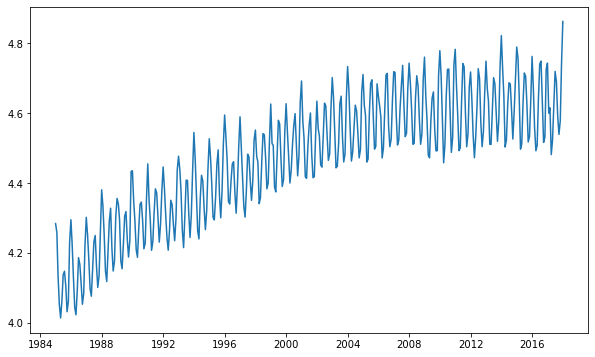

In [71]:
#estimating tred
inx_logscale=np.log(inx)
plt.plot(inx_logscale)

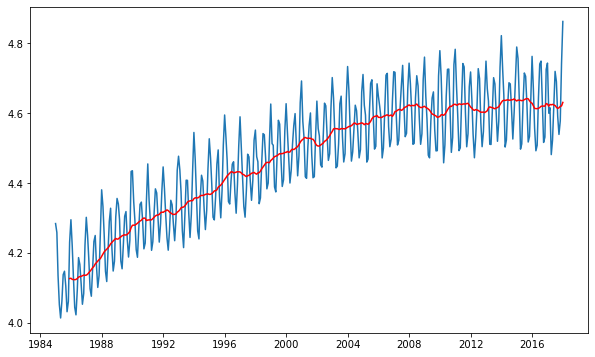

In [72]:
movingavg=inx_logscale.rolling(window=12).mean()
movingstd=inx_logscale.rolling(window=12).std()
plt.plot(inx_logscale)
plt.plot(movingavg,color='red')

In [73]:
d1=inx_logscale-movingavg
d1.head()

#remove non values

d1.dropna(inplace=True)
d1.head(10)

,Production
Date,
1985-12-01,0.103961
1986-01-01,0.167724
1986-02-01,0.095629
1986-03-01,0.007329
1986-04-01,-0.079115
1986-05-01,-0.101472
1986-06-01,-0.033363
1986-07-01,0.055963
1986-08-01,0.034639


In [74]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingavg=timeseries.rolling(window=12).mean()
    movingstd=timeseries.rolling(window=12).std()
    
    org=plt.plot(timeseries,color='blue',label='Original')
    mean=plt.plot(movingavg,color='red',label='rolling std')
    std=plt.plot(movingstd,color='black',label='rolling std')
    plt.legend(loc='best')
    plt.title('rolling mean and std')
    plt.show(block=False)
    
    #dickey fuller test
    print('result of dickey fuller test')
    dft=adfuller(timeseries['Production'],autolag='AIC')
    dfo=pd.Series(dft[0:4],index=['Test statistic','p value','lags used','number of obs used'])
    for key,value in dft[4].items():
        dfo['critical value (%s)'%key]=value
    print(dfo)

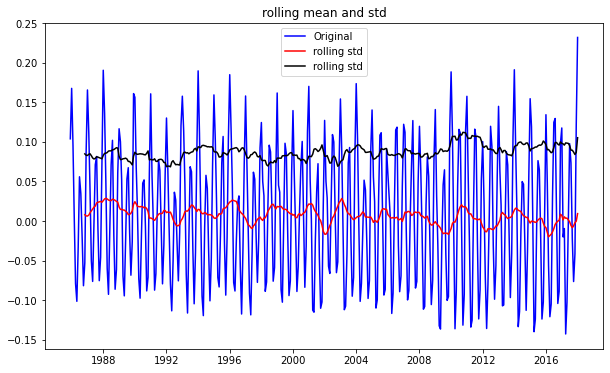

result of dickey fuller test
Test statistic           -5.211586
p value                   0.000008
lags used                15.000000
number of obs used      370.000000
critical value (1%)      -3.448148
critical value (5%)      -2.869383
critical value (10%)     -2.570948
dtype: float64


In [75]:
test_stationarity(d1)

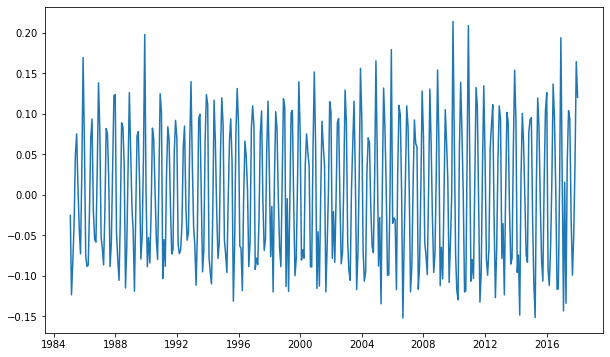

In [76]:
d2=inx_logscale-inx_logscale.shift()
plt.plot(d2)

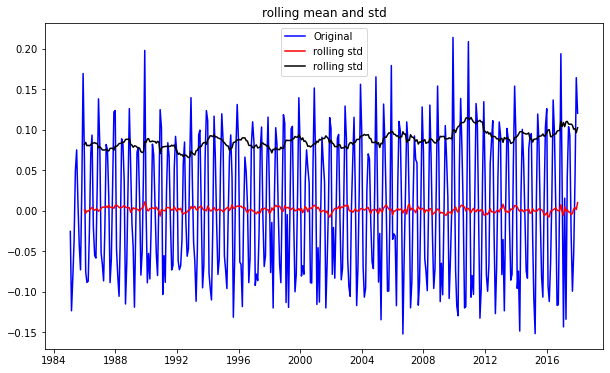

result of dickey fuller test
Test statistic         -6.748333e+00
p value                 2.995161e-09
lags used               1.400000e+01
number of obs used      3.810000e+02
critical value (1%)    -3.447631e+00
critical value (5%)    -2.869156e+00
critical value (10%)   -2.570827e+00
dtype: float64


In [77]:
d2.dropna(inplace=True)
test_stationarity(d2)

In [78]:
from statsmodels.tsa.seasonal import seasonal_decompose
dec=seasonal_decompose(inx_logscale)
residual=dec.resid

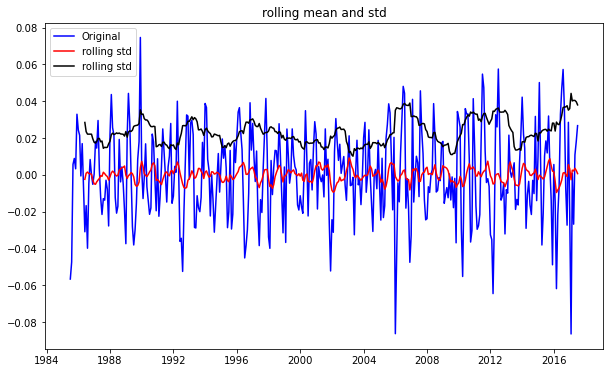

result of dickey fuller test


KeyError: 'Production'

In [79]:
decomposedlogdate=residual
decomposedlogdate.dropna(inplace=True)
test_stationarity(decomposedlogdate)

C:\Users\Sagar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sagar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


plotting ar model


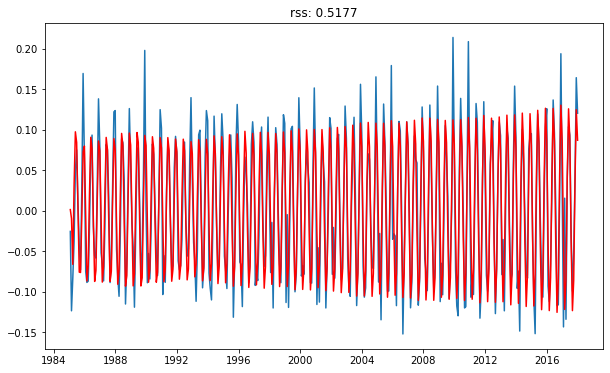

In [80]:
#ma model
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(inx_logscale,order=(2,1,2))
results_MA=model.fit(disp=1)
plt.plot(d2)
plt.plot(results_MA.fittedvalues,color='red')
plt.title("rss: %.4f"% sum((results_MA.fittedvalues-d2["Production"])**2))
print("plotting ar model")


C:\Users\Sagar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sagar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Text(0.5, 1.0, 'rss: 0.5177')

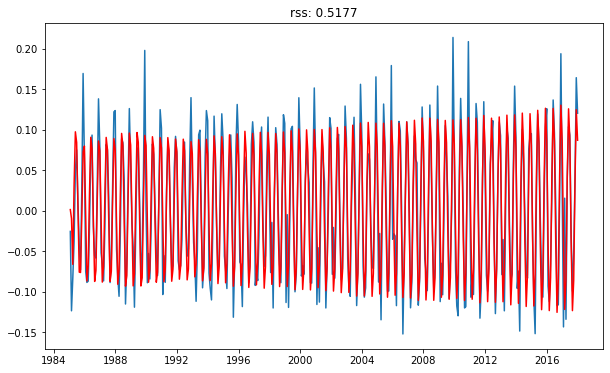

In [81]:
model=ARIMA(inx_logscale,order=(2,1,2))
results_ARIMA=model.fit(disp=-1)
plt.plot(d2)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title("rss: %.4f"% sum((results_ARIMA.fittedvalues-d2["Production"])**2))

In [ ]:
#calc cumulative sum
predictions_ARIMA_diff_cumsum=pd.Series(results_ARIMA.fittedvalues,copy=True)
print(predictions_ARIMA_diff.head())

In [ ]:
predictions_ARIMA_log=pd.Series(inx_logscale['Production'].iloc[0],index=inx_logscale.index)
predictions_ARIMA_log=predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

In [ ]:
predictions_ARIMA=np.exp(predictions_ARIMA_log)
plt.plot(inx)
plt.plot(predictions_ARIMA)

In [ ]:
inx_logscale


In [ ]:
results_ARIMA.plot_predict(1,520)


In [ ]:
results_ARIMA.forecast(steps=120)

SyntaxError: invalid syntax (<ipython-input-82-aa53e597e0cd>, line 1)